# Decorated Merge Trees with LArTPC data.


In [1]:
"""

"""

import sys; sys.path.insert(0, '..')
from blip.module.merge_tree_module import *
from blip.topology.merge_tree      import MergeTree

In [2]:
point_clouds = []

event = 0
data_file = "/home/laura/Analysis_Laura/Decorated-Merge-Trees/data/single_capture_gamma_2.5661.0/tpc2.npz"
# data_file = "/data/single_capture_gamma_2.5661.0/tpc2.npz"
f = np.load(data_file, allow_pickle=True)
point_clouds.append(np.array(f['view_2_features'][event][:, :2])) #each event is just one gamma capture

print("Number of points in point cloud 1: ",len(point_clouds[0]))
print(point_clouds)

Number of points in point cloud 1:  147
[array([[4304., 2957.],
       [4335., 3111.],
       [4335., 3112.],
       [4335., 3113.],
       [4335., 3114.],
       [4335., 3115.],
       [4335., 3116.],
       [4336., 3110.],
       [4336., 3111.],
       [4336., 3112.],
       [4336., 3113.],
       [4336., 3114.],
       [4336., 3115.],
       [4336., 3116.],
       [4336., 3117.],
       [4337., 3280.],
       [4337., 3281.],
       [4337., 3282.],
       [4337., 3283.],
       [4338., 3082.],
       [4338., 3083.],
       [4338., 3084.],
       [4338., 3279.],
       [4338., 3280.],
       [4338., 3281.],
       [4338., 3282.],
       [4338., 3283.],
       [4338., 3284.],
       [4340., 3259.],
       [4340., 3260.],
       [4340., 3261.],
       [4340., 3262.],
       [4340., 3263.],
       [4340., 3264.],
       [4340., 3265.],
       [4341., 3258.],
       [4341., 3259.],
       [4341., 3260.],
       [4341., 3261.],
       [4341., 3262.],
       [4341., 3263.],
       [4341., 3


Point Cloud 0
Number of points: 147
Number of persistence points: 65
[INIT] Merge Tree Class
[INIT] visualize_DMT_pointcloud


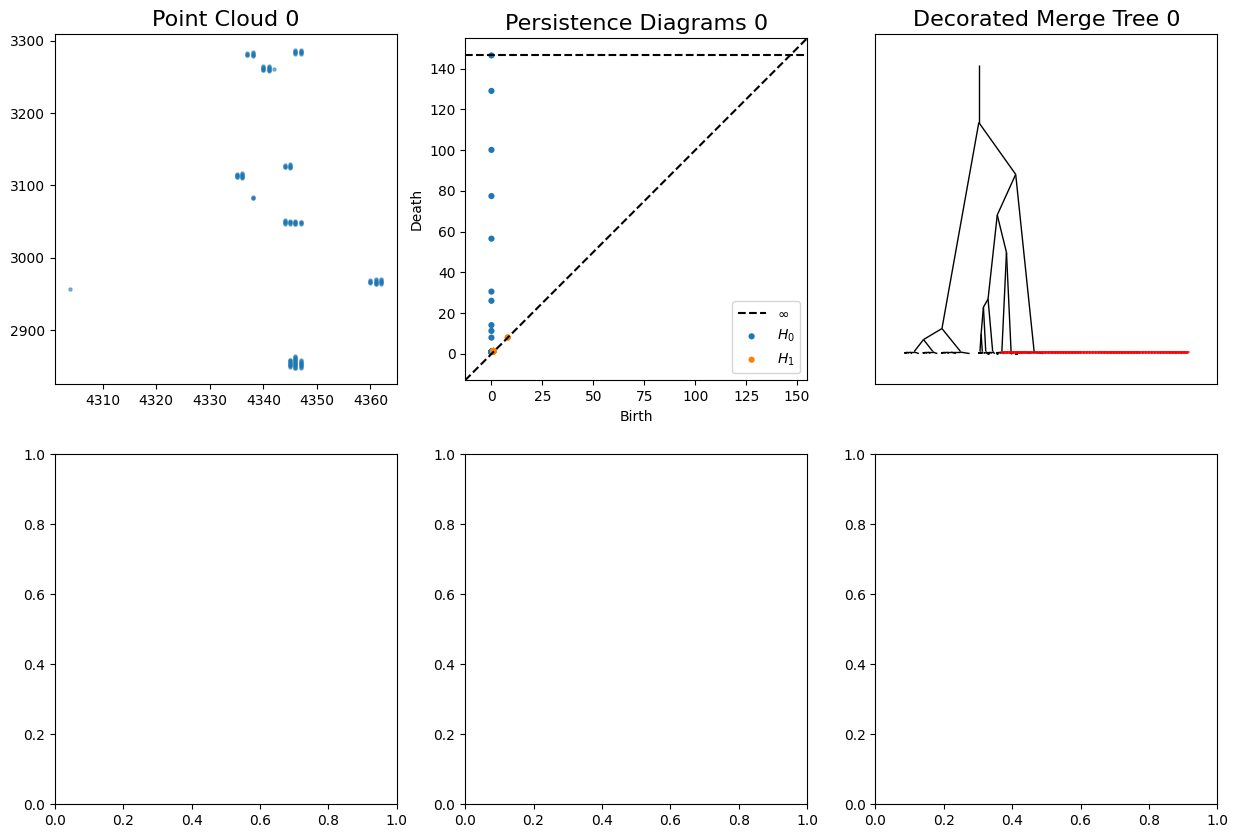

In [3]:
fig, axs = plt.subplots(len(point_clouds)+1, 3, figsize = (15,10))
for j,data in enumerate(point_clouds):
    print('\nPoint Cloud '+str(j))
    print('Number of points: '+str(data.shape[0]))
    
    # Plot point cloud
    try:               ax = axs[j,0]
    except IndexError: ax = axs[0]
    ax.set_title('Point Cloud '+str(j),fontsize = 16)
    ax.scatter(data[:,0],data[:,1], s=5,alpha=0.5)
    
    # Plot persistence diagrams
    try:               ax = axs[j,1]
    except IndexError: ax = axs[1]
    ax.set_title('Persistence Diagrams '+str(j),fontsize = 16)
    dgms = ripser(data)['dgms']
    print('Number of persistence points: '+str(dgms[1].shape[0]))    
    persim.plot_diagrams(dgms, ax = ax)
    
    # Plot decorated merge trees
    # Note: the merge tree class has a built in visualization method, but we are doing it
    # 'by hand' here to fit into the overall figure
    try:               ax = axs[j,2]
    except IndexError: ax = axs[2]
    ax.set_title('Decorated Merge Tree '+str(j),fontsize = 16)
    ax.tick_params(left=True, bottom=False, labelleft=True, labelbottom=False)
    
    MT = MergeTree(pointCloud = data,simplify=False,debug=False)
    tree_thresh    = 0.2    # Simplification parameter for visualization
    barcode_thresh = 0.4    # Simplification parameter for visualization
    T_DMT, pos_DMT, edges, colors, weights = visualize_DMT_pointcloud(MT.tree,
                                                                      MT.height,
                                                                      dgms[1],
                                                                      data,
                                                                      tree_thresh,
                                                                      barcode_thresh,
                                                                      offset = .02,
                                                                      draw = False)
    nx.draw_networkx(T_DMT, 
                     pos = pos_DMT, 
                     edge_color=colors, 
                     width=weights,
                     node_size = 0,
                     with_labels = False,
                     ax = ax)
fig.show()
# T_DMT:   graph, 
# pos_DMT: position of the nodes in the graph
# edges:   list of edges in the graph

In [4]:
# Checking process_view_tree() outputs
linkage,tree,node2distance = create_merge_tree(data,debug=False)
points_0 = linkage[:,0] # first column with the position of the first point
points_1 = linkage[:,1] # second column with the position of the second point
idx_true = np.where(linkage==2)[0] # index position for the cluster created from 2 points

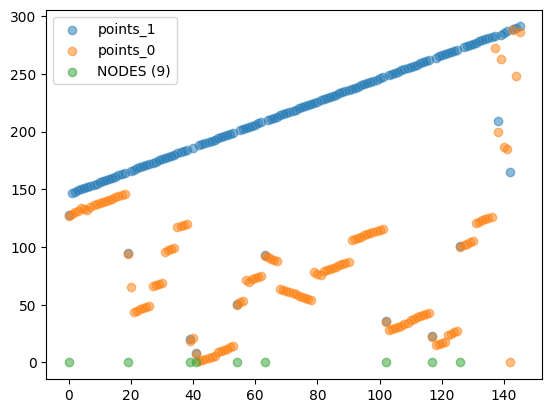

In [5]:
# How to get the nodes from the linkage matrix PLOT
true_candidates = linkage[:,0]+linkage[:,2]-linkage[:,1]
plt.scatter(np.arange(len(linkage[:,1])),linkage[:,1], label="points_1",alpha=0.5)
plt.scatter(np.arange(len(linkage[:,0])),linkage[:,0], label="points_0",alpha=0.5)
plt.scatter(np.where(true_candidates==0)[0],true_candidates[np.where(true_candidates==0)[0]], label="NODES ("+str(len(np.where(true_candidates==0)[0]))+")",alpha=0.5)
plt.legend()
plt.show()

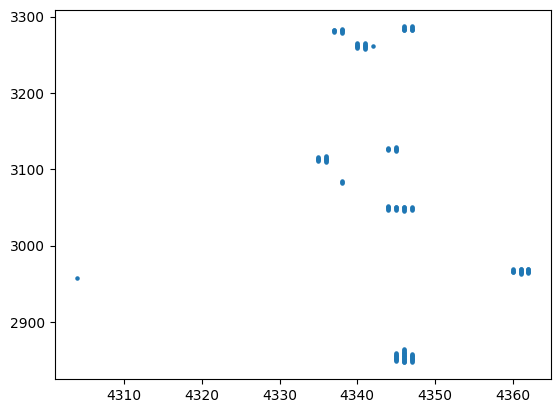

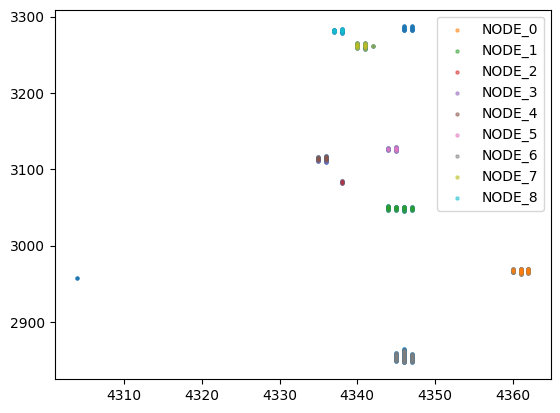

In [10]:
# How to represent the points in the point cloud with the node number
plt.scatter(data[:,0],data[:,1], s=5)
plt.show()

plt.scatter(data[:,0],data[:,1], s=5)
input_events = []; nodes_indices = []
for i in range(len(idx_true)-1):
    points_cluster_i = np.arange(idx_true[i],idx_true[i+1])
    # print(points_cluster_i)
    # print(i,idx_true[i])
    # print(i+1,idx_true[i+1])
    p0 = points_0[points_cluster_i]
    p1 = points_1[points_cluster_i]
    linkage_points = np.concatenate((np.array(p0).astype(int),np.array(p1).astype(int)))

    # print("linkage_points:",linkage_points)
    plt.scatter(data[:,0][(np.array(p0).astype(int))],data[:,1][(np.array(p0).astype(int))], s=5,alpha=0.5,label="NODE_" + str(i))
plt.legend()
plt.show()